In [99]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Section1: Data Exploration 
---
1. Renamed columns 
2. Convert Accuracy to float64
3. Address missing value in productivity and utilisation % (filled with mean value)
4. Visualisation to study the distribution of numerical data 
5. Correlation analysis among the 4 numerical columns 
---
### Feature Engineering: 
1. Parsed market & conducted encoding (the encoding portion can potentially be used for matching model, if needed, it is not used in the following part)
2. Normalise Handling time 
7. Scaled all 4 columns to ensure all 4 columns ~ N(0,1) to avoid any latency weight 

In [100]:
moderator = pd.read_excel("sample_data.xlsx", sheet_name=1)
moderator.head()

,moderator,market,Productivity,Utilisation %,handling time,accuracy
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,-
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887


In [101]:
moderator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moderator      1414 non-null   int64  
 1   market         1414 non-null   object 
 2   Productivity   1285 non-null   float64
 3   Utilisation %  1285 non-null   float64
 4   handling time  1414 non-null   int64  
 5    accuracy      1414 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 66.4+ KB


In [102]:
# rename columns 
moderator = moderator.rename(columns={'Utilisation %': 'Utilisation_%', 'handling time': 'Handling_time',' accuracy ':'Accuracy'})

In [103]:
# Change Accuracy from object to value 
moderator['Accuracy'] = pd.to_numeric(moderator['Accuracy'], errors='coerce')

# Calculate the mean of the column
column_mean = moderator['Accuracy'].mean()

# Replace NaN values with the calculated mean
moderator['Accuracy'].fillna(column_mean, inplace=True)


In [104]:
# handle missing values in utilisaion % and handling time 
cols = ['Productivity','Utilisation_%']
for col in cols: 
    column_mean = moderator[col].mean()
    moderator[col].fillna(column_mean, inplace=True)


In [105]:
moderator.describe()

,moderator,Productivity,Utilisation_%,Handling_time,Accuracy
count,1.414000e+03,1414.000000,1414.000000,1.414000e+03,1414.000000
mean,1.073880e+15,366.484054,0.722875,9.681603e+04,0.853531
std,8.371512e+14,170.307383,0.188214,3.572110e+05,0.121786
min,1.003316e+06,0.540000,0.000000,0.000000e+00,0.250000
25%,6.955122e+06,261.674375,0.681149,4.913700e+04,0.797000
50%,1.695067e+15,362.949231,0.762312,8.135100e+04,0.892000
75%,1.736353e+15,446.047500,0.843051,1.000525e+05,0.939000
max,1.774284e+15,1323.355000,1.287250,9.443621e+06,1.000000


In [106]:
moderator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   moderator      1414 non-null   int64  
 1   market         1414 non-null   object 
 2   Productivity   1414 non-null   float64
 3   Utilisation_%  1414 non-null   float64
 4   Handling_time  1414 non-null   int64  
 5   Accuracy       1414 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 66.4+ KB


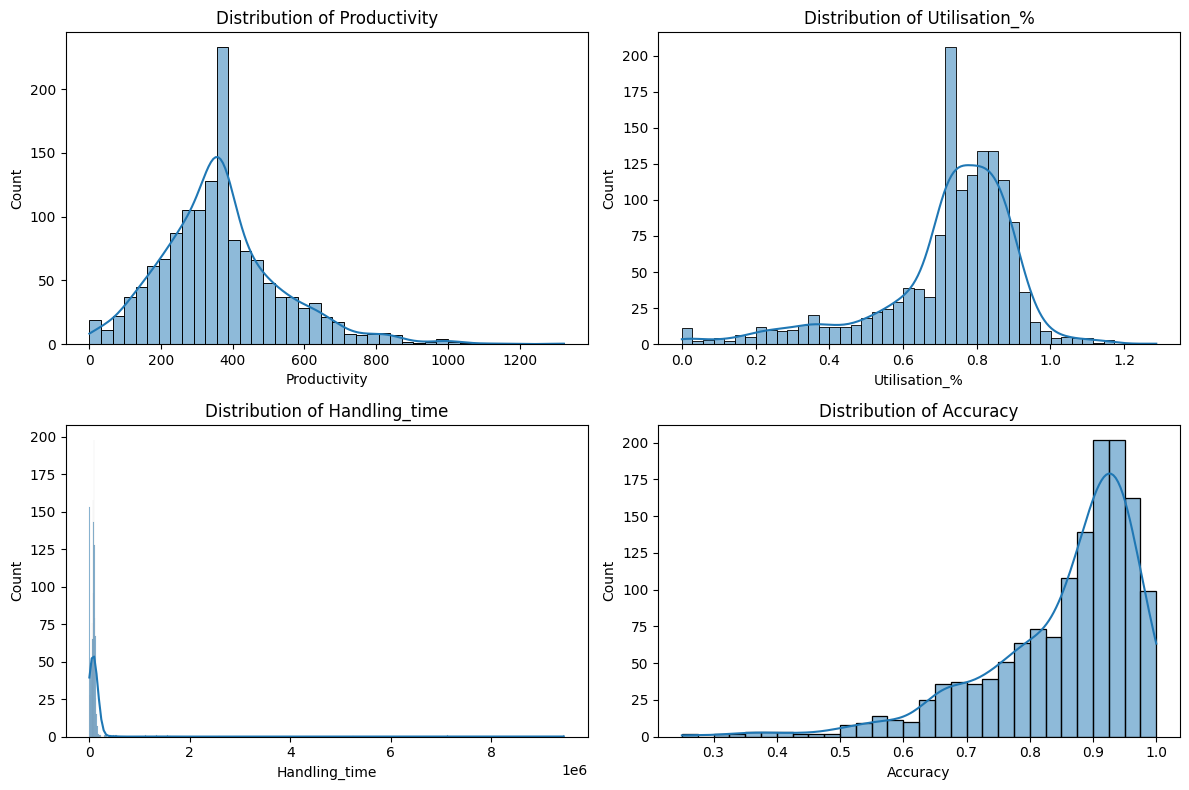

In [107]:
# Visualisation 
numerical_columns = ['Productivity','Utilisation_%','Handling_time','Accuracy']

# Create subplots for each column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a distribution plot
for i, column in enumerate(numerical_columns):
    sns.histplot(moderator[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Observation: 
1. Productivity follows a normal distribution (slighly left skwed). The range of the data is wide 
2. Utilisation_% follows a normal distribution 
3. Accuracy is highly right skewed (we do expect moderator to have good accuracy)
4. Handling time is highly left skewed --> we might consider normalise the data 

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/3776268634.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((moderator['Handling_time'].dropna()), ax=axs[0])
/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/3776268634.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

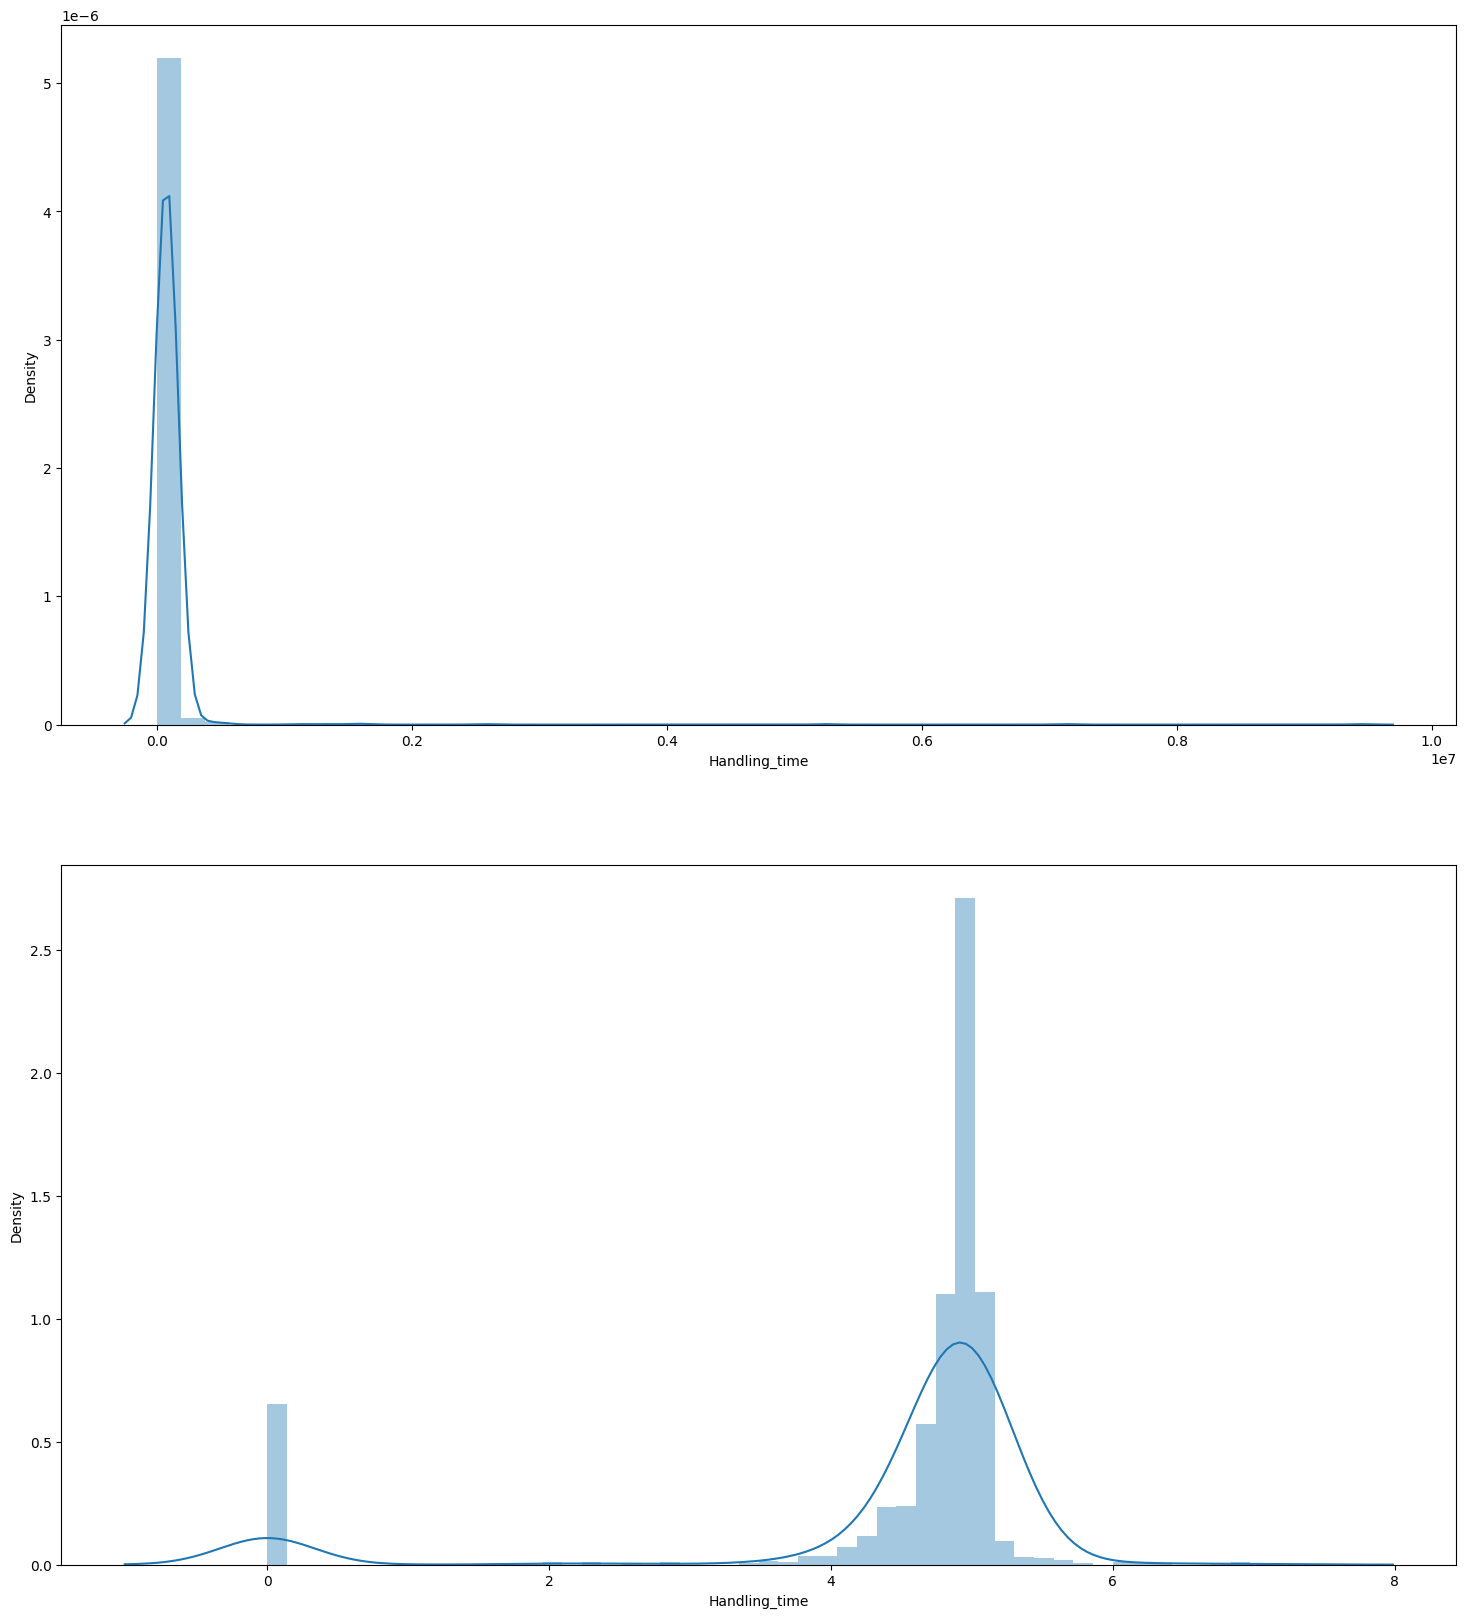

In [108]:
# attempt to normalise data 
fig, axs = plt.subplots(nrows=2, figsize=(18, 20))
sns.distplot((moderator['Handling_time'].dropna()), ax=axs[0])
sns.distplot((np.log10(moderator['Handling_time'] + 1).dropna()), ax=axs[1])
plt.show()

As normalisation seems to work for handling time, we shall normalise the handling time 

               Productivity  Utilisation_%  Handling_time  Accuracy
Productivity       1.000000       0.373665      -0.016724  0.128647
Utilisation_%      0.373665       1.000000      -0.041413  0.209205
Handling_time     -0.016724      -0.041413       1.000000 -0.070286
Accuracy           0.128647       0.209205      -0.070286  1.000000


<Axes: >

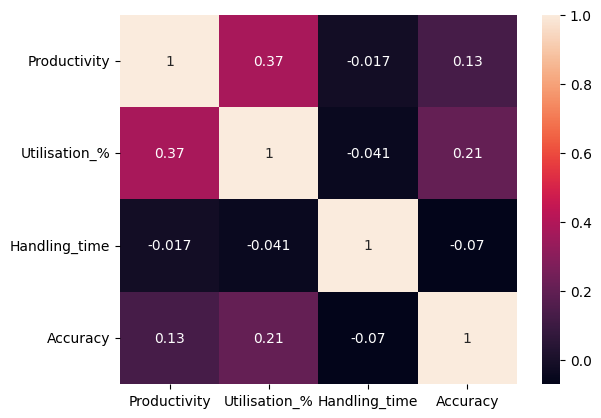

In [109]:
df = moderator.copy()
df.drop(columns=["moderator","market"],inplace=True)
print(df.corr())
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

As we can see, productivity and utilisation % has a moderate positive correlation, where as handling time has a weak negative correlation with both productivity and utilisation. Accuracy has a week positive correlation with productivity and utilisation % too. 

## Feature Engineering 

In [110]:
# 1. normalise handling time 
moderator['Handling_time_Normalised'] = np.log10(moderator['Handling_time'] + 1)
moderator.head()

,moderator,market,Productivity,Utilisation_%,Handling_time,Accuracy,Handling_time_Normalised
0,1689841547143170,"[""SA"", ""OM"", ""BH"", ""QA"", ""JO"", ""IQ"", ""KW"", ""EG...",286.217674,0.812403,123549,0.853531,5.091843
1,1686755036370945,"[""RO""]",174.560000,0.704833,25547,0.959000,4.407357
2,1741913197768705,"[""VN""]",334.376000,0.819167,50794,1.000000,4.705821
3,1743415203890193,"[""MX"", ""UY"", ""CL"", ""AR"", ""CO"", ""EC"", ""PE"", ""BR""]",452.277500,0.775474,89626,0.941000,4.952439
4,1710346282427393,"[""PH""]",612.312500,0.843229,98066,0.887000,4.991523


In [111]:
# 2. parse out the market array and performed encoding (this is for matching later)
import ast
# Parse the "market" column into a list
moderator['market'] = moderator['market'].apply(lambda x: ast.literal_eval(x))

In [112]:
# Encoding with python dummies 
encoded_market = pd.get_dummies(moderator['market'].apply(pd.Series).stack()).groupby(level=0).sum()

# Concatenate the one-hot encoded DataFrame with the original DataFrame
moderator = pd.concat([moderator, encoded_market], axis=1)

moderator.head()

,moderator,market,Productivity,Utilisation_%,Handling_time,Accuracy,Handling_time_Normalised,AE,AR,AT,...,TH,TN,TR,TW,UA,US,UY,UZ,VN,ZA
0,1689841547143170,"[SA, OM, BH, QA, JO, IQ, KW, EG, LB]",286.217674,0.812403,123549,0.853531,5.091843,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1686755036370945,[RO],174.560000,0.704833,25547,0.959000,4.407357,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1741913197768705,[VN],334.376000,0.819167,50794,1.000000,4.705821,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1743415203890193,"[MX, UY, CL, AR, CO, EC, PE, BR]",452.277500,0.775474,89626,0.941000,4.952439,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1710346282427393,[PH],612.312500,0.843229,98066,0.887000,4.991523,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df = moderator[['Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']] # created a copy of moderator and drop the original handling time 
df.head()

,Productivity,Utilisation_%,Accuracy,Handling_time_Normalised
0,286.217674,0.812403,0.853531,5.091843
1,174.560000,0.704833,0.959000,4.407357
2,334.376000,0.819167,1.000000,4.705821
3,452.277500,0.775474,0.941000,4.952439
4,612.312500,0.843229,0.887000,4.991523


In [114]:
df.describe()

,Productivity,Utilisation_%,Accuracy,Handling_time_Normalised
count,1414.000000,1414.000000,1414.000000,1414.000000
mean,366.484054,0.722875,0.853531,4.416559
std,170.307383,0.188214,0.121786,1.438934
min,0.540000,0.000000,0.250000,0.000000
25%,261.674375,0.681149,0.797000,4.691417
50%,362.949231,0.762312,0.892000,4.910368
75%,446.047500,0.843051,0.939000,5.000232
max,1323.355000,1.287250,1.000000,6.975139


Observation: 
- The 4 columns have different mean and std, and some have very different range from the others. This could create latent weight later on in our scale -- as the more left / right skwed data carries a "naturally lower/higher" weight than others. To address this issue, we decide to scale all 4 columns to make them ~ N(0,1) with standardscaler. This is also to the fact that standardscaler is less sensitive to outliers. 

In [115]:
# 3. Scaled productivity and handling time as the range for columns are v different 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

df[['Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']] = scaler.fit_transform(df[['Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']])

# Now, 'scaled_df' contains the standardized data
print(df.head())
df.describe()

   Productivity  Utilisation_%      Accuracy  Handling_time_Normalised
0     -0.471470       0.475842 -9.119424e-16                  0.469460
1     -1.127326      -0.095890  8.663273e-01                 -0.006397
2     -0.188597       0.511790  1.203103e+00                  0.201096
3      0.503935       0.279564  7.184744e-01                  0.372546
4      1.443950       0.639682  2.749159e-01                  0.399718


/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/3258583231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']] = scaler.fit_transform(df[['Productivity', 'Utilisation_%', 'Accuracy', 'Handling_time_Normalised']])


,Productivity,Utilisation_%,Accuracy,Handling_time_Normalised
count,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03
mean,1.526360e-16,1.457266e-16,-3.856729e-16,-3.404475e-16
std,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00
min,-2.149487e+00,-3.842070e+00,-4.957432e+00,-3.070412e+00
25%,-6.156325e-01,-2.217719e-01,-4.643483e-01,1.910829e-01
50%,-2.076289e-02,2.096113e-01,3.159861e-01,3.432984e-01
75%,4.673408e-01,6.387356e-01,7.020463e-01,4.057723e-01
max,5.620481e+00,2.999647e+00,1.203103e+00,1.778736e+00


# SECTION 2: Scoring Model 
---

## Justification for beta:
---
We will generate a score ranged from 0 to 1. The data can be divided into 2 parts -- accuracy and efficiency (efficiency = Productivity, Utilisation % and handling time). For accuracy, we will use what is given in the dataset. For efficiency, we will generate a score for it considering all 3 remaining attributes. Lastly, we will combine accuracy and efficiency together to generate the priority score for each moderator. 

### Some creteria:
1. Productivity, utilisation rate and accuracy : Higher is better --> beta must be positive
2. handling time: lower is better --> beta is negative
3. constant: we assume that for new mdoerator with no data, we will assume they can perform up to the average level --> which means we  filled up NA for all of them. Hence, we do not consider a "minimum" score for them as they will have a score generated based on the filled up values. 

---
### Efficiency 
#### Choice of parameter:
- Let's first assume all 3 attributes (Productivity, Utilisation % and handling time) share an equal weight. Let's say, 0.33 for productivity and utilisation %, and -0.33 for handling time. 
- It is mentioned that one of our aim is to increase utilisation rate by more than 10%. However, we are aware that utilisation rate highly depends on the moderators' action -- it depends on how much task has been assigned to the moderator AND his productivity, and thus this is not something we can control. As such, it appears to us that it makes more sense to assign a higher weight to the productivity instead of utilisation rate, or to simply assign equal weight to all of them. 
- Based on correlation graph above, productivity have a moderate positive correlation with utilisation %, we would also like to avoid double counting the combined effect of productivity and utilisation %. Hence, we would like to assign a lower weight to utilisation (0.3) 
- Since correlation of handling time with the other 2 attributes are small, we will keep the weight for handling time as -0.33. 

With these in mind, we are able to quantify the efficiency of our moderator as such: 


Y = 0.33 * productivity + 0.3 * utilisation % - 0.33 * handling time 


In [116]:
beta = [0.33, 0.3, -0.33] #
df2 = df[['Productivity','Utilisation_%','Handling_time_Normalised','Accuracy']]
df2['efficiency'] = 0.33 * df2['Productivity'] + 0.3 * df2['Utilisation_%'] - 0.33 * df2['Handling_time_Normalised']
print(df2.head())
df2.describe()

   Productivity  Utilisation_%  Handling_time_Normalised      Accuracy  \
0     -0.471470       0.475842                  0.469460 -9.119424e-16   
1     -1.127326      -0.095890                 -0.006397  8.663273e-01   
2     -0.188597       0.511790                  0.201096  1.203103e+00   
3      0.503935       0.279564                  0.372546  7.184744e-01   
4      1.443950       0.639682                  0.399718  2.749159e-01   

   efficiency  
0   -0.167754  
1   -0.398673  
2    0.024938  
3    0.127228  
4    0.536502  


/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/2589805558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['efficiency'] = 0.33 * df2['Productivity'] + 0.3 * df2['Utilisation_%'] - 0.33 * df2['Handling_time_Normalised']


,Productivity,Utilisation_%,Handling_time_Normalised,Accuracy,efficiency
count,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03
mean,1.526360e-16,1.457266e-16,-3.404475e-16,-3.856729e-16,2.003741e-16
std,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,5.924808e-01
min,-2.149487e+00,-3.842070e+00,-3.070412e+00,-4.957432e+00,-1.786924e+00
25%,-6.156325e-01,-2.217719e-01,1.910829e-01,-4.643483e-01,-3.421438e-01
50%,-2.076289e-02,2.096113e-01,3.432984e-01,3.159861e-01,-1.227237e-02
75%,4.673408e-01,6.387356e-01,4.057723e-01,7.020463e-01,3.302903e-01
max,5.620481e+00,2.999647e+00,1.778736e+00,1.203103e+00,1.916211e+00


### Scoring Model 
--- 
- As shown above, efficiency has a range around -1.227 to 1.916 and accuracy has a range around 1.2 to -4.64e-01. 
- Based on our business sense, it makes more sense to assign a higher weight on accuracy. Considering situations where A) moderator review the ads incorrectly and inappropriate content is published, or B) moderator is slighly slower, but the public is still receiving correct content. For social media platform like TikTok, it seems to make more sense to secure our accuracy rather than efficiency -- if we have to choose one between the two. As such, as decide to assign 0.6 for accuracy and 0.4 for efficiency. 
- To avoid any latent weight, we standardised efficiency to ensure it is ~ N(0,1) just like accuracy. 

Our final score for each moderator will be Y = 0.5 * accuracy + 0.5 * efficiency. 


In [117]:
scaler = StandardScaler()

df2[['efficiency']] = scaler.fit_transform(df2[['efficiency']])

# Now, 'scaled_df' contains the standardized data
print(df2.head())
df2.describe()

   Productivity  Utilisation_%  Handling_time_Normalised      Accuracy  \
0     -0.471470       0.475842                  0.469460 -9.119424e-16   
1     -1.127326      -0.095890                 -0.006397  8.663273e-01   
2     -0.188597       0.511790                  0.201096  1.203103e+00   
3      0.503935       0.279564                  0.372546  7.184744e-01   
4      1.443950       0.639682                  0.399718  2.749159e-01   

   efficiency  
0   -0.283239  
1   -0.673126  
2    0.042106  
3    0.214813  
4    0.905838  


/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/2574335030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['efficiency']] = scaler.fit_transform(df2[['efficiency']])


,Productivity,Utilisation_%,Handling_time_Normalised,Accuracy,efficiency
count,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03
mean,1.526360e-16,1.457266e-16,-3.404475e-16,-3.856729e-16,-2.386901e-17
std,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00
min,-2.149487e+00,-3.842070e+00,-3.070412e+00,-4.957432e+00,-3.017069e+00
25%,-6.156325e-01,-2.217719e-01,1.910829e-01,-4.643483e-01,-5.776810e-01
50%,-2.076289e-02,2.096113e-01,3.432984e-01,3.159861e-01,-2.072085e-02
75%,4.673408e-01,6.387356e-01,4.057723e-01,7.020463e-01,5.576674e-01
max,5.620481e+00,2.999647e+00,1.778736e+00,1.203103e+00,3.235361e+00


In [118]:
'''
Not used as we used standardisation to ensure that accuracy and efficiency share same mean & std (so no latency weight)
def min_max_scale(col):
    min_score = min(df2[col])
    max_score = max(df2[col])
    df2[col] = df2[col].apply(lambda x: (x-min_score)/(max_score-min_score))

min_max_scale("efficiency")
min_max_scale("Accuracy")
df2.describe()
''' 

'\nNot used as we used standardisation to ensure that accuracy and efficiency share same mean & std (so no latency weight)\ndef min_max_scale(col):\n    min_score = min(df2[col])\n    max_score = max(df2[col])\n    df2[col] = df2[col].apply(lambda x: (x-min_score)/(max_score-min_score))\n\nmin_max_scale("efficiency")\nmin_max_scale("Accuracy")\ndf2.describe()\n'

In [119]:
beta = [0.6,0.4]
df2['moderator_score'] = 0.6 * df2['Accuracy'] + 0.4 * df2['efficiency']
df2.describe()

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/904837958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['moderator_score'] = 0.6 * df2['Accuracy'] + 0.4 * df2['efficiency']


,Productivity,Utilisation_%,Handling_time_Normalised,Accuracy,efficiency,moderator_score
count,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03
mean,1.526360e-16,1.457266e-16,-3.404475e-16,-3.856729e-16,-2.386901e-17,-2.317806e-16
std,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,7.666192e-01
min,-2.149487e+00,-3.842070e+00,-3.070412e+00,-4.957432e+00,-3.017069e+00,-4.079117e+00
25%,-6.156325e-01,-2.217719e-01,1.910829e-01,-4.643483e-01,-5.776810e-01,-4.390697e-01
50%,-2.076289e-02,2.096113e-01,3.432984e-01,3.159861e-01,-2.072085e-02,1.605300e-01
75%,4.673408e-01,6.387356e-01,4.057723e-01,7.020463e-01,5.576674e-01,5.084596e-01
max,5.620481e+00,2.999647e+00,1.778736e+00,1.203103e+00,3.235361e+00,1.691606e+00


### Transformation of the score
---
As shown, the score is ranged between 0 to 1.69, we would like to standardise our score to be ranged from 0 to 1. To do so, we are going to make use of min-max scaling 

In [120]:
min_score = min(df2['moderator_score'])
max_score = max(df2['moderator_score'])

df2['moderator_score'] = df2['moderator_score'].apply(lambda x: (x-min_score)/(max_score-min_score))

df2.describe()

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/330755794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['moderator_score'] = df2['moderator_score'].apply(lambda x: (x-min_score)/(max_score-min_score))


,Productivity,Utilisation_%,Handling_time_Normalised,Accuracy,efficiency,moderator_score
count,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1.414000e+03,1414.000000
mean,1.526360e-16,1.457266e-16,-3.404475e-16,-3.856729e-16,-2.386901e-17,0.706864
std,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,1.000354e+00,0.132846
min,-2.149487e+00,-3.842070e+00,-3.070412e+00,-4.957432e+00,-3.017069e+00,0.000000
25%,-6.156325e-01,-2.217719e-01,1.910829e-01,-4.643483e-01,-5.776810e-01,0.630778
50%,-2.076289e-02,2.096113e-01,3.432984e-01,3.159861e-01,-2.072085e-02,0.734682
75%,4.673408e-01,6.387356e-01,4.057723e-01,7.020463e-01,5.576674e-01,0.794974
max,5.620481e+00,2.999647e+00,1.778736e+00,1.203103e+00,3.235361e+00,1.000000


Now, let's observe the distribution of the score 

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/3052929366.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['moderator_score'])


<Axes: xlabel='moderator_score', ylabel='Density'>

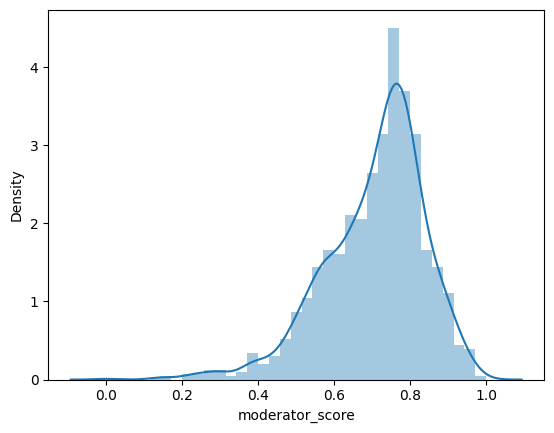

In [121]:
sns.distplot(df2['moderator_score'])

The score is similar to a normal distribution. Considering big number theorm, with mean around 0.7, this is making sense in real life context, as we do expect our moderator to be at least "good" in moderating ads. 

### The final output for our scoring model is moderator_df (as shown below): 


In [126]:
# final output 
df2['moderator'] = moderator['moderator']
df2['market'] = moderator['market']
moderator_df = df2[['moderator','market','Productivity', 'Utilisation_%', 'Handling_time_Normalised', 'Accuracy', 'efficiency', 'moderator_score']]
moderator_df.head()

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/539507184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['moderator'] = moderator['moderator']
/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_21302/539507184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['market'] = moderator['market']


,moderator,market,Productivity,Utilisation_%,Handling_time_Normalised,Accuracy,efficiency,moderator_score
0,1689841547143170,"[SA, OM, BH, QA, JO, IQ, KW, EG, LB]",-0.471470,0.475842,0.469460,-9.119424e-16,-0.283239,0.687231
1,1686755036370945,[RO],-1.127326,-0.095890,-0.006397,8.663273e-01,-0.673126,0.750281
2,1741913197768705,[VN],-0.188597,0.511790,0.201096,1.203103e+00,0.042106,0.834873
3,1743415203890193,"[MX, UY, CL, AR, CO, EC, PE, BR]",0.503935,0.279564,0.372546,7.184744e-01,0.214813,0.796456
4,1710346282427393,[PH],1.443950,0.639682,0.399718,2.749159e-01,0.905838,0.798236
